# Random Sample Impuation]


In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_train = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t')   
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [46]:
data = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv",
                           sep='\t',usecols=['Age','Fare','Survived'])   
data.head(85)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
80,0,22.0,9.0000
81,1,29.0,9.5000
82,1,NaN,7.7875
83,0,28.0,47.1000


In [4]:
data.isnull().sum()

Survived     0
Age         30
Fare         0
dtype: int64

In [40]:
data.Age.isnull().sum()

30

In [47]:
data['Age'].dropna().sample(data.Age.isnull().sum())

4      35.0
112    22.0
136    19.0
97     23.0
13     39.0
3      35.0
37     21.0
103    33.0
93     26.0
20     35.0
53     29.0
127    24.0
146    27.0
10      4.0
142    24.0
104    37.0
90     29.0
115    21.0
50      7.0
148    36.5
23     28.0
16      2.0
85     33.0
2      26.0
86     16.0
147     9.0
123    32.5
116    70.5
73     26.0
51     21.0
Name: Age, dtype: float64

In [57]:
def impute(dataset,variable,median):
    data[variable+'_median']=data[variable].fillna(median)
    data[variable+'_random']=data[variable]
    
    sample_vale=data[variable].dropna().sample(data[variable].isnull().sum())
    
    sample_vale.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+'_random']=sample_vale

In [58]:
median=data.Age.median()
median

26.0

In [59]:
impute(data,'Age',median)

In [60]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

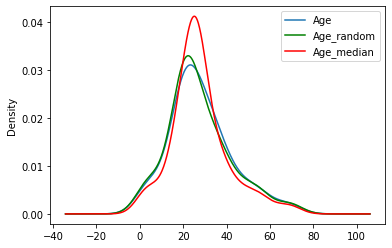

In [67]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)

data['Age_random'].plot(kind='kde',ax=ax,color='green')
data['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

In [ ]:
#pros and cons

#pros
1. less change or distortion in original variance
2. easy to implement

#cons
randomness to work in every situation